<a href="https://colab.research.google.com/github/victoraccete/ML-bootcamp/blob/master/Mod_2/Desafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading and inspecting the dataset

In [3]:
# dataset documentation from https://archive.ics.uci.edu/ml/datasets/banknote+authentication
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', 
                 header=None,
                 names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [5]:
df.shape

(1372, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
# separating inputs and output
X = df.iloc[:, 0:4]
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [24]:
y = df.iloc[:, -1:]
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [4]:
from sklearn.model_selection import train_test_split

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.30, 
                                                     random_state=1)
 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 4), (412, 4), (960, 1), (412, 1))

## Perguntas do desafio

#### 1. Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [39]:
print('R:', df.shape)

R: (1372, 5)


#### 2. Qual variável possui o maior range (diferença entre valor máximo e mínimo)?


In [57]:
df.max() - df.min()

variance    13.8669
skewness    26.7247
curtosis    23.2135
entropy     10.9977
class        1.0000
dtype: float64

In [58]:
print("R: skewness")

R: skewness


#### 3-4. Qual a média das colunas Skewness e Entropy?


In [60]:
print("R:")
print(f'Skewness mean: {df.skewness.mean()}')
print(f'Entropy mean: {df.entropy.mean()}')

R:
Skewness: 1.9223531206393603
Entropy: -1.191656520043731


#### 5. Qual a mediana da coluna variance?

In [63]:
print(f'Variance median: {df.variance.median()}')

Variance median: 0.49618


#### 6. Qual a desvio padrão da coluna curtosis?

In [64]:
print(f'Curtosis std: {df.curtosis.std()}')

Curtosis: 4.310030090106595


#### 7. Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)?

In [94]:
df['class'].sum()

610

In [76]:
# can also be done with:
(y == 1).sum()

class    610
dtype: int64

In [93]:
# summing all 0 and all 1 values
(df['class'] == 1).sum() + (df['class'] == 0).sum()

1372

In [91]:
# however, since we know there are no null values, we can simply do:
len(df['class'])

1372

In [89]:
# checking if there are null values
df['class'].isna().sum()

0

In [102]:
print('Percentage: {0:.2f}%'.format(100*df['class'].sum()/len(df['class'])))

Percentage: 44.46%


#### 8. Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis?

In [104]:
df[['skewness', 'curtosis']].corr(method='pearson')

,skewness,curtosis
skewness,1.000000,-0.786895
curtosis,-0.786895,1.000000


In [106]:
print("R: -0.786895")

R: -0.786895


#### 9. Qual a acurácia do KNN no conjunto de teste?

#### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)

clf_KNN.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
KNN_pred = clf_KNN.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_test, KNN_pred)
print('R:', KNN_acc)

R: 0.9975728155339806


#### 10. Qual a acurácia da Árvore de Decisão no conjunto de teste?


#### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=1)

In [116]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [118]:
from sklearn.metrics import accuracy_score
tree_pred = clf_tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print('R:', tree_acc)

R: 0.9878640776699029


#### 11. Qual a acurácia do Random Forest no conjunto de teste?

#### Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth=8, random_state=1)

In [120]:
clf_forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [121]:
from sklearn.metrics import accuracy_score
forest_pred = clf_forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)
print('R:', forest_acc)

R: 0.9951456310679612


#### 12. Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class?

In [132]:
print(clf_tree.feature_importances_)
index = clf_tree.feature_importances_.argmax()
print(index) # the max value is in index 0
df.columns[0]

[0.64483576 0.18895411 0.15110674 0.01510339]
0


'variance'

#### 13. Qual o valor da importância relativa da feature skewness?

In [137]:
index = (df.columns == 'skewness').argmax()
print(index) # print at which index skewness is
print("Importance:", clf_forest.feature_importances_[index])

1
Importance: 0.24058588894949182


#### 14. Qual a acurácia do SVM no conjunto de teste?

#### SVM

In [35]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto', kernel='rbf', random_state=1)

In [138]:
clf_svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [142]:
from sklearn.metrics import accuracy_score
svm_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("R:", svm_acc)

R: 1.0


#### 15. Qual a acurácia da rede MLP no conjunto de teste?

#### MLP

In [36]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)

In [140]:
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [141]:
from sklearn.metrics import accuracy_score
mlp_pred = clf_mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)
print("R:", mlp_acc)

R: 1.0


#### Bonus

In [147]:
accuracies = np.array([KNN_acc, tree_acc, forest_acc, svm_acc, mlp_acc])
accuracies

array([0.99757282, 0.98786408, 0.99514563, 1.        , 1.        ])

Text(0.5, 1.0, 'Accuracy comparison (y axis starts at 95%).')

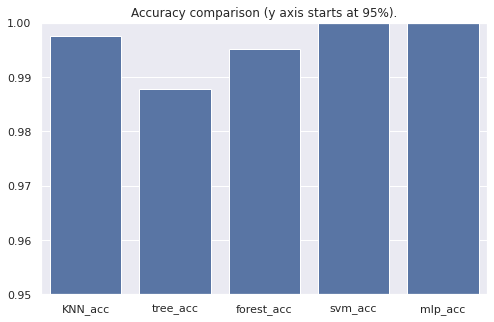

In [168]:
sns.set_theme()
plt.figure(figsize=(8,5))
g = sns.barplot(x=['KNN_acc', 'tree_acc', 'forest_acc', 'svm_acc', 'mlp_acc'], y=accuracies, palette=['b'])
plt.ylim(.95, 1)
plt.title('Accuracy comparison (y axis starts at 95%).')